The Lorenz model is used to study the climate change and is given by

dx
dt = a(y − x)
dy
dt = −xz + bx − y
dz
dt = xy − cz

where a = 10, c = 8/3 are some constants. b denotes the temperature difference between the top and bottom
surfaces of the fluid. Solve the equations with RK-4 method with a = 10, c = 8/3 and b = 5, 10, 25. Plot the
following:

In [1]:
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [2]:
def xt(x, y, z, t):
    return (10*(y - x))

def yt(x, y, z, t, b):
    return (-x*z + b*x - y)

def zt(x, y, z, t):
    return (x*y - (8.0/3.0 * z))

In [34]:
def RungeKutta4(xt ,yt ,zt ,inital_conditions ,b,n = 3500, T = 50):
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    t = np.zeros(n+1)
        
    x0 , y0, z0 = inital_conditions
    x[0] = x0
    y[0] = y0
    z[0] = z0
    t[0] = 0
    
    dt = T/float(n) #0.01
    
    for k in range (n):
    
        t[k+1] = t[k] + dt
        
        k1 = xt(x[k], y[k], z[k], t[k])
        l1 = yt(x[k], y[k], z[k], t[k], b)
        m1 = zt(x[k], y[k], z[k], t[k])

        k2 = xt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        l2 = yt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2), b)
        m2 = zt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))

        k3 = xt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        l3 = yt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2), b)
        m3 = zt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))

        k4 = xt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = yt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt), b)
        m4 = zt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

    return x, y, z, t

In [35]:
inital_conditions = (1,0,0)

a) z as a function of time for b = 5, 10, 25 for x = 1, y = z = 0. You can move from t = 0s to t = 50s. Is
there any stricking difference at b = 25?

In [24]:
def plotfig(t,z):
    plt.figure (figsize = (3,3))
    plt.plot (t, z, linewidth = 1)
    plt.grid (True)
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )


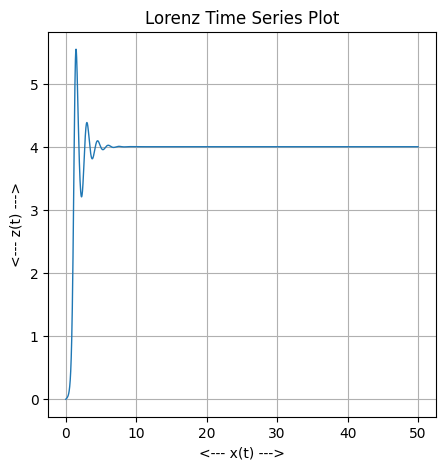

In [36]:
x, y, z, t = RungeKutta4(xt,yt,zt,inital_conditions,5)
plotfig(t,z)

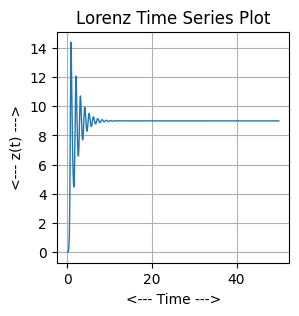

In [26]:
x, y, z, t = RungeKutta4(xt,yt,zt,inital_conditions,10)
plotfig(t,z)

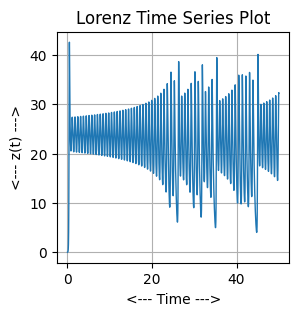

In [27]:
x, y, z, t = RungeKutta4(xt,yt,zt,inital_conditions,25)
plotfig(t,z)

b) The trajectory of Lorenz model (for b = 25) in x − z plane with initial condition as x = 1, y = z = 0.

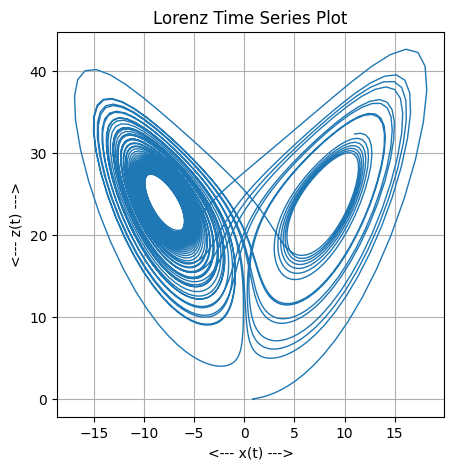

In [28]:
def plotfig(x,z):
    plt.figure (figsize = (5,5))
    plt.plot (x, z, linewidth = 1)
    plt.grid (True)
    plt.xlabel ( '<--- x(t) --->' )
    plt.ylabel ( '<--- z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )
    
x, y, z, t = RungeKutta4(xt,yt,zt,inital_conditions,25)
plotfig(x,z)

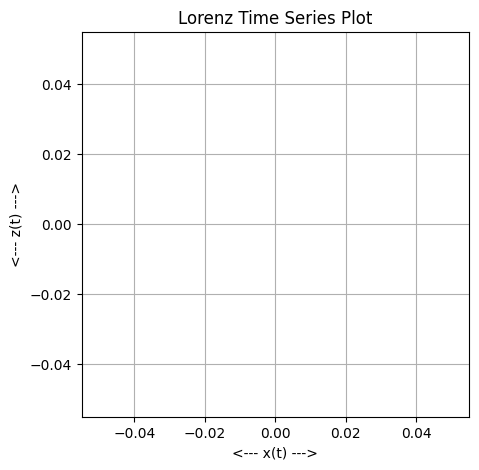

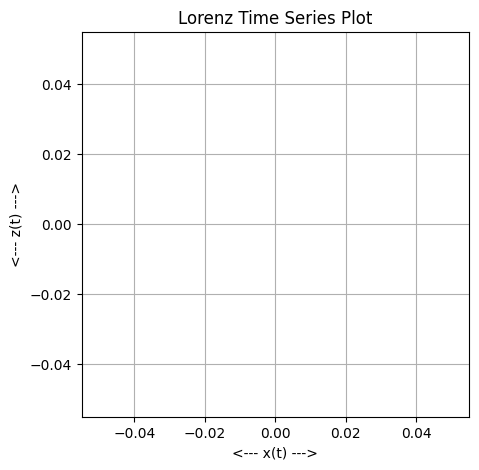

In [37]:
# (c) The trajectory in yz plane when x = 0 with b = 25.
inital_conditions = (0,0,0)

def plotfig(v,z):
    plt.figure (figsize = (5,5))
    plt.plot (v, z, linewidth = 1)
    plt.grid (True)
    plt.xlabel ( '<--- x(t) --->' )
    plt.ylabel ( '<--- z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )
    
x, y, z, t = RungeKutta4(xt,yt,zt,inital_conditions,25)

plotfig(y,z)
# (d) The trajectory in xz plane when y = 0 with b = 25.
plotfig(x,z)